In [37]:
import pyodbc
import yfinance as yf
import pandas as pd
from sqlalchemy import create_engine
import datetime
from datetime import date, timedelta

# Verbindungsstring
conn_str = (
    r'Driver=SQL Server;'
    r'Server=.\SQLEXPRESS;'
    r'Database=studienprojekt;'
    r'Trusted_Connection=yes;'
)

# Verbindung zur Datenbank herstellen
cnxn = pyodbc.connect(conn_str)

# SQLAlchemy connectable erstellen
engine = create_engine('mssql+pyodbc://', creator=lambda: cnxn)

# Tabelle prüfen
table_name = "stock_data"  # Name der Zieltabelle
start_date = "2022-07-01"  # Startdatum, ab dem Daten überprüft werden sollen
end_date = "2023-07-01"  # Enddatum, bis zu dem Daten überprüft werden sollen
company_name = "MSFT"  # nur AAPL, MSFT oder GOOG möglich // Name des Unternehmens, für das Daten geladen werden sollen

# Daten aus der Tabelle für das bestimmte Unternehmen in einen DataFrame laden
select_query = f"SELECT * FROM {table_name} WHERE date >= ? AND date <= ? AND Company = ?"
data = pd.read_sql(select_query, con=engine, params=(start_date, end_date, company_name))

# added
data["ID"] = data.index
data = data[["ID", "Date", "Company", "Type", "Open", "High", "Low", "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

# Verbindung schließen
cnxn.close()

# DataFrame anzeigen
print(data.tail())


      ID       Date Company Type        Open        High         Low  \
246  246 2023-06-26    MSFT  ACT  333.720001  336.109985  328.489990   
247  247 2023-06-27    MSFT  ACT  331.859985  336.149994  329.299988   
248  248 2023-06-28    MSFT  ACT  334.660004  337.980011  333.809998   
249  249 2023-06-29    MSFT  ACT  334.709991  336.109985  332.619995   
250  250 2023-06-30    MSFT  ACT  337.750000  342.730011  337.200012   

          Close    Volume  
246  328.600006  21520600  
247  334.570007  24354100  
248  335.850006  20259500  
249  335.049988  16997000  
250  340.540009  26823800  


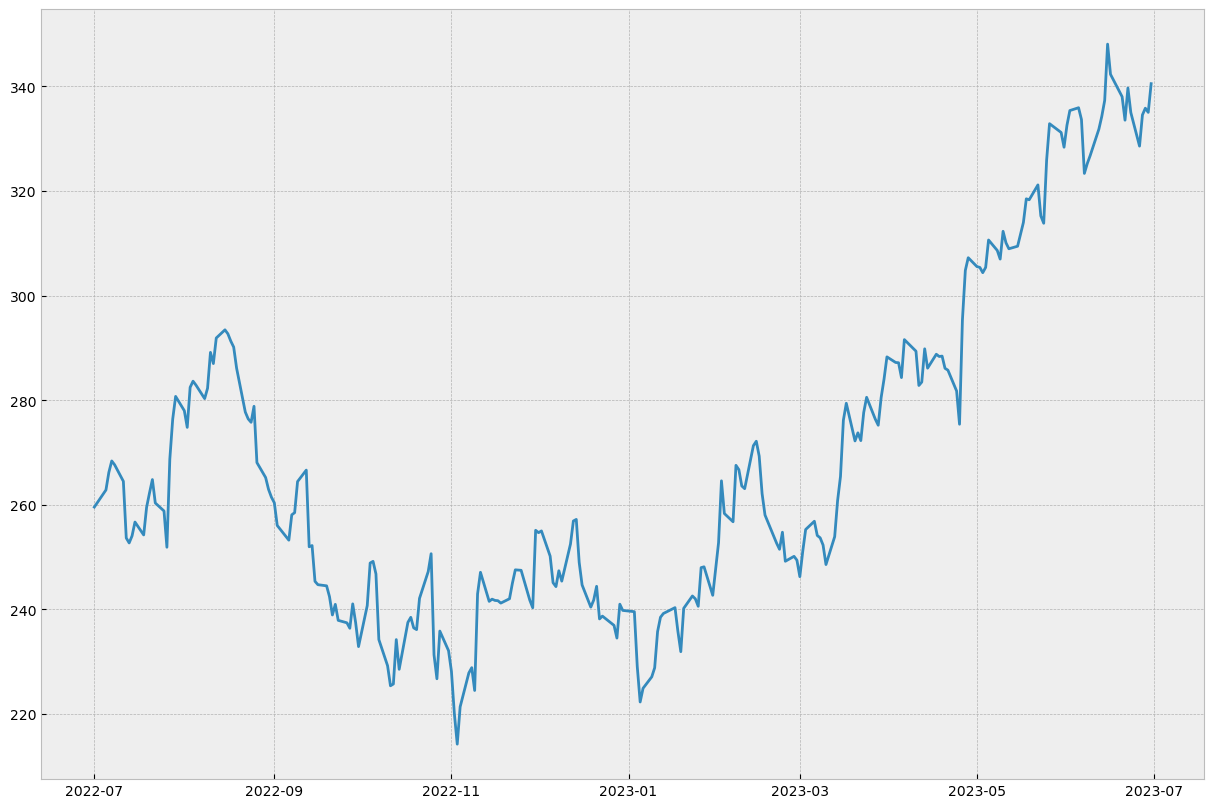

In [38]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

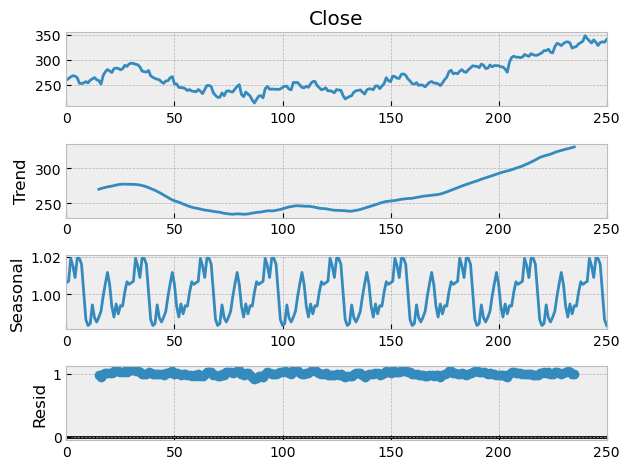

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot() 

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

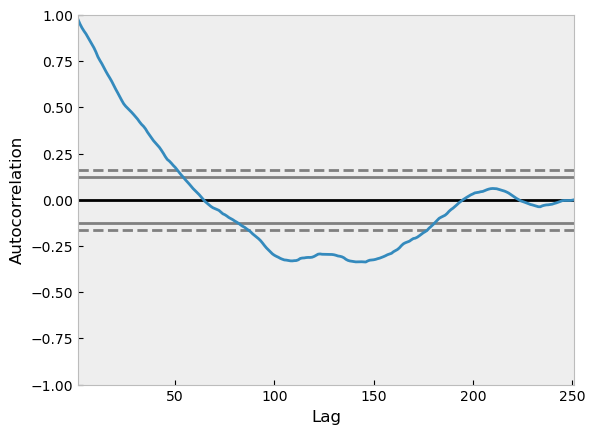

In [40]:
pd.plotting.autocorrelation_plot(data["Close"])

In [41]:
data

,ID,Date,Company,Type,Open,High,Low,Close,Volume
0,0,2022-07-01,MSFT,ACT,256.390015,259.769989,254.610001,259.579987,22837700
1,1,2022-07-05,MSFT,ACT,256.160004,262.980011,254.740005,262.850006,22941000
2,2,2022-07-06,MSFT,ACT,263.750000,267.989990,262.399994,266.209991,23824400
3,3,2022-07-07,MSFT,ACT,265.119995,269.059998,265.019989,268.399994,20859900
4,4,2022-07-08,MSFT,ACT,264.790009,268.100006,263.290009,267.660004,19658800
...,...,...,...,...,...,...,...,...,...
246,246,2023-06-26,MSFT,ACT,333.720001,336.109985,328.489990,328.600006,21520600
247,247,2023-06-27,MSFT,ACT,331.859985,336.149994,329.299988,334.570007,24354100
248,248,2023-06-28,MSFT,ACT,334.660004,337.980011,333.809998,335.850006,20259500
249,249,2023-06-29,MSFT,ACT,334.709991,336.109985,332.619995,335.049988,16997000


In [43]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima

# Annahme: Sie haben Ihre Zeitreihendaten in einem DataFrame namens 'data' geladen

# Die Zeitreihendaten in eine eindimensionale NumPy-Array-ähnliche Struktur umwandeln
y = np.array(data['Close'])

# AutoARIMA-Modell erstellen und anpassen, um die optimalen Parameterwerte zu ermitteln
model = auto_arima(y, seasonal=False, trace=True)

# Die optimalen Parameterwerte für P, D und Q ausgeben
print(f"Optimale Werte für P, D und Q: {model.order}")
p, d, q = model.order


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1537.350, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1541.658, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1541.804, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1540.816, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1540.611, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1535.889, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1535.465, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1535.761, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1539.950, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1537.662, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1534.658, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1539.590, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1535.308, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1535.141, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]          

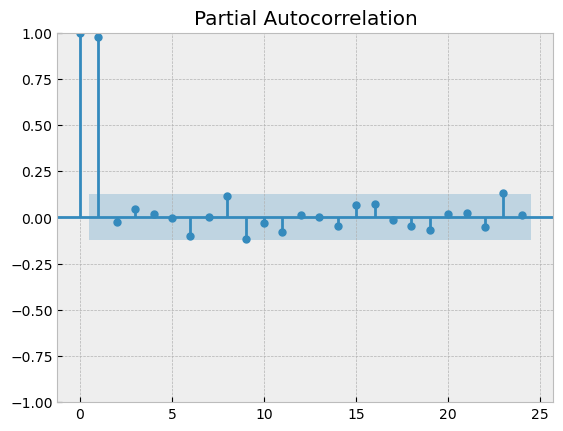

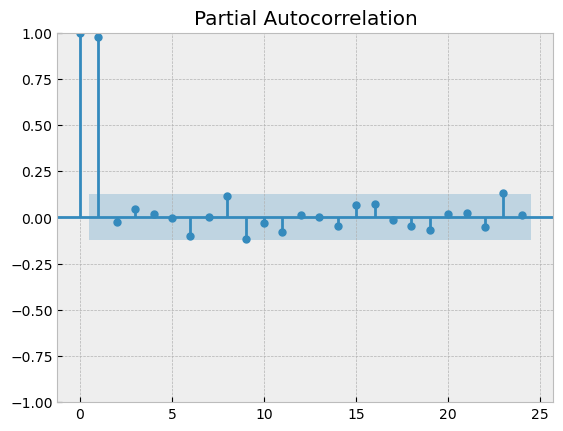

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"])

In [8]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [9]:
test_result=adfuller(data['Close'])

In [10]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [12]:
adfuller_test(data['Close'])

ADF Test Statistic : -1.4237081484876286
p-value : 0.5708588493540431
#Lags Used : 0
Number of Observations Used : 250
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [14]:
data['Close First Difference'] = data['Close'] - data['Close'].shift(1)

In [15]:
data['Close'].shift(1)

0             NaN
1      109.081001
2      113.887001
3      115.213501
4      119.306000
          ...    
246    123.019997
247    119.089996
248    119.010002
249    121.080002
250    120.010002
Name: Close, Length: 251, dtype: float64

In [17]:
data['Seasonal First Difference']=data['Close']-data['Close'].shift(12)

In [19]:
data.head(14)

,ID,Date,Company,Type,Open,High,Low,Close,Volume,Close First Difference,Seasonal First Difference
0,0,2022-07-01,GOOG,ACT,108.336998,109.806351,107.105003,109.081001,31028000,NaN,NaN
1,1,2022-07-05,GOOG,ACT,107.514503,114.052597,106.249496,113.887001,36398000,4.806000,NaN
2,2,2022-07-06,GOOG,ACT,114.092003,116.351997,112.250504,115.213501,28852000,1.326500,NaN
3,3,2022-07-07,GOOG,ACT,116.008003,119.862000,115.533997,119.306000,32184000,4.092499,NaN
4,4,2022-07-08,GOOG,ACT,117.550003,120.434998,117.514000,120.168503,29082000,0.862503,NaN
5,5,2022-07-11,GOOG,ACT,118.650002,118.794502,116.234497,116.522499,26718000,-3.646004,NaN
6,6,2022-07-12,GOOG,ACT,116.838501,117.849503,114.614998,114.849503,24970000,-1.672997,NaN
7,7,2022-07-13,GOOG,ACT,112.639000,115.156998,111.822998,112.186996,38958000,-2.662506,NaN
8,8,2022-07-14,GOOG,ACT,110.825996,111.987503,109.325500,111.440002,32366000,-0.746994,NaN
9,9,2022-07-15,GOOG,ACT,112.962997,114.000504,111.822502,112.766998,34330000,1.326996,NaN


In [21]:


## Again test dickey fuller test
adfuller_test(data['Seasonal First Difference'].dropna())



ADF Test Statistic : -3.5339795581259423
p-value : 0.0071561254443881115
#Lags Used : 12
Number of Observations Used : 226
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: >

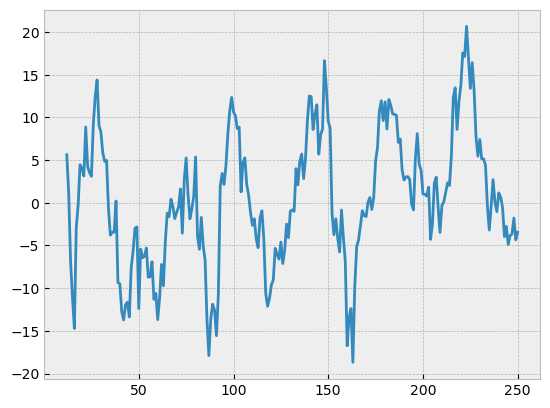

In [22]:
data['Seasonal First Difference'].plot()

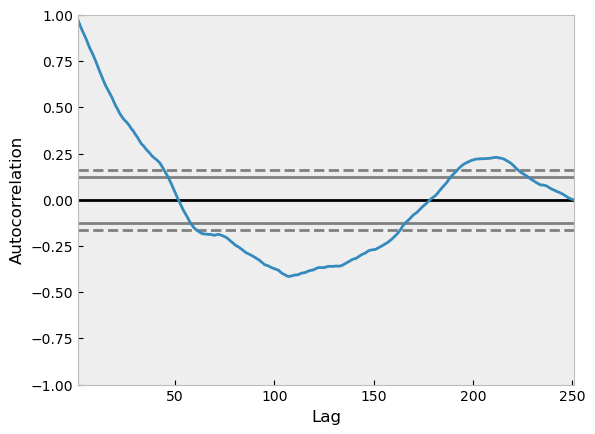

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Close'])
plt.show()

In [44]:
#p, d, q = 0, 1, 0
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data["Close"], order=(p,d,q))
fitted = model.fit()

print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -764.329
Date:                Sun, 09 Jul 2023   AIC                           1534.658
Time:                        08:54:31   BIC                           1545.223
Sample:                             0   HQIC                          1538.910
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0796      0.072      1.104      0.269      -0.062       0.221
ma.L2         -0.1769      0.064     -2.757      0.006      -0.303      -0.051
sigma2        26.4821      1.854     14.287      0.0

In [45]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      259.580437
2      263.055269
3      265.886608
4      268.057260
          ...    
246    333.426381
247    329.302291
248    335.843353
249    334.918493
250    335.059280
Name: predicted_mean, Length: 251, dtype: float64


In [46]:
import statsmodels.api as sm
import warnings
import time

# Startzeit messen
start_time = time.time()

model = sm.tsa.statespace.SARIMAX(data['Close'],
                                 order=(p, d, q),
                                 seasonal_order=(p, d, q, 12))
model = model.fit()

# Endzeit messen
end_time = time.time()

# Gesamtdauer berechnen
duration = end_time - start_time

print(model.summary())
print("Durchlaufdauer:", duration, "Sekunden")

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -748.858
Date:                            Sun, 09 Jul 2023   AIC                           1507.717
Time:                                    08:54:42   BIC                           1525.078
Sample:                                         0   HQIC                          1514.714
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0778      0.064      1.222      0.222      -0.047       0.203
ma.L2         -0.1790      0.065   

In [47]:
predictions = model.predict(len(data), len(data)+30)
print(predictions)

251    342.590944
252    343.067827
253    342.679880
254    342.209604
255    341.953914
256    342.487381
257    343.407086
258    343.222642
259    344.661162
260    344.338818
261    343.613766
262    343.908694
263    345.587123
264    346.719844
265    346.486617
266    346.131084
267    346.001148
268    346.371060
269    347.451380
270    347.440139
271    348.747060
272    348.379727
273    347.661641
274    347.806811
275    349.475405
276    350.635219
277    350.401992
278    350.046458
279    349.916523
280    350.286434
281    351.366754
Name: predicted_mean, dtype: float64


<Axes: >

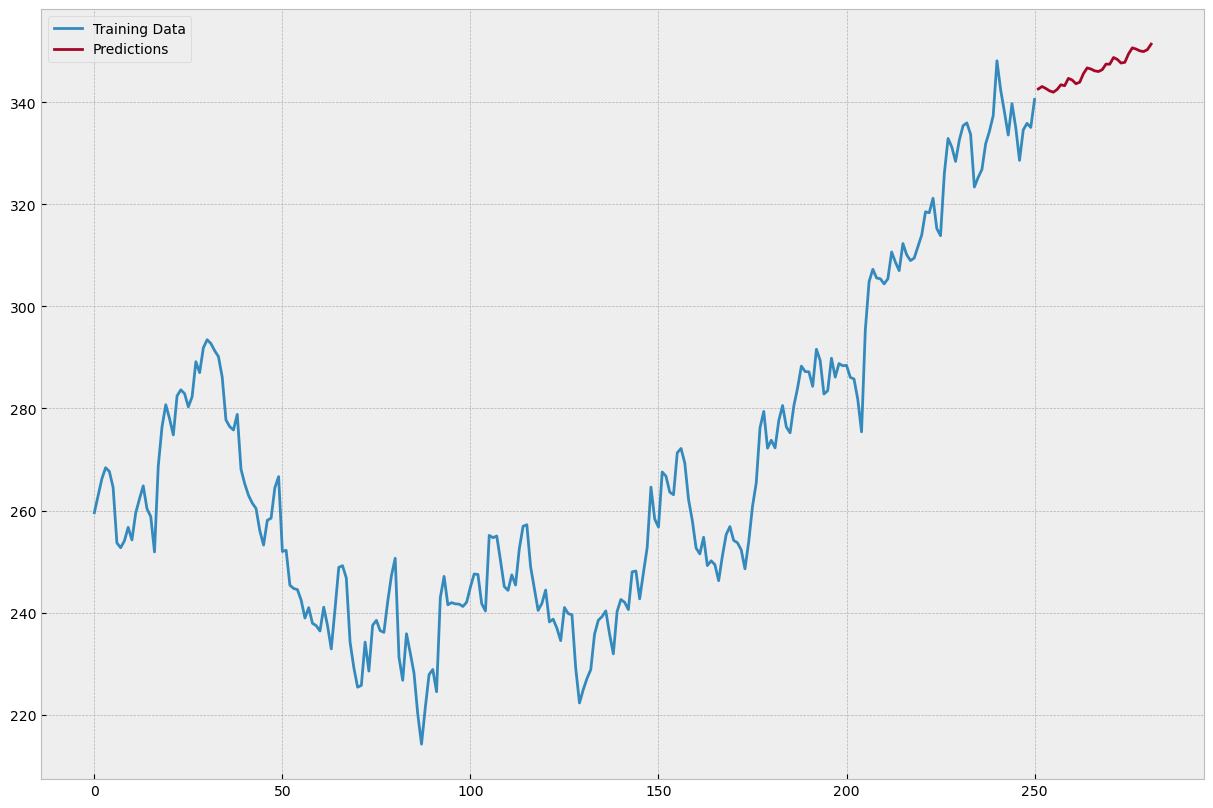

In [48]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

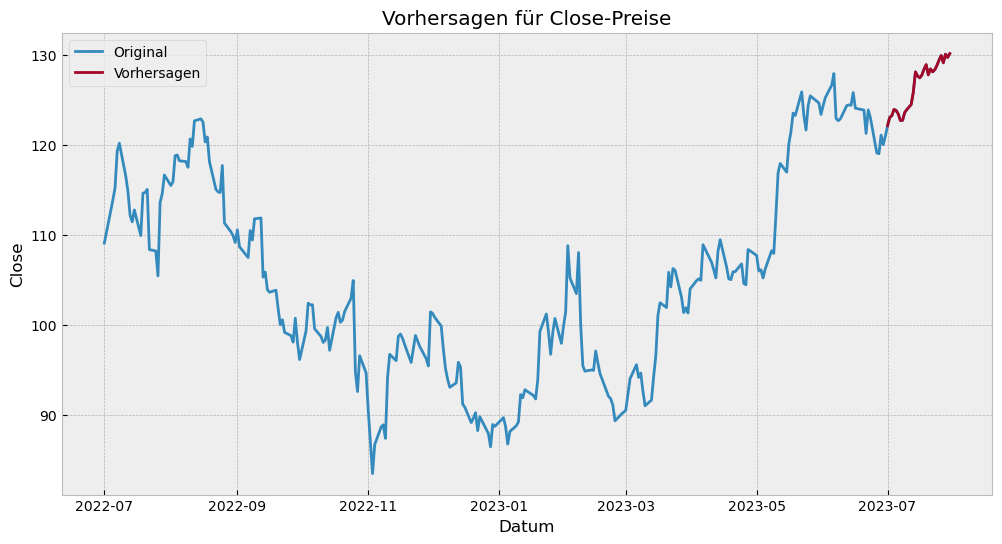

In [11]:
# Vorhersagen für die nächsten 30 Tage erhalten
predictions = model.predict(len(data), len(data) + 29)  # 30 Tage Vorhersagen

# Daten für die nächsten 30 Tage generieren
future_dates = pd.date_range(start=data['Date'].iloc[-1] + timedelta(days=1), periods=30)

# Ein DataFrame für die Vorhersagen erstellen
df_predictions = pd.DataFrame({
    'Date': future_dates,
    'Close': predictions
})

# DataFrame erweitern, indem Sie die Vorhersagen anhängen
data_extended = pd.concat([data, df_predictions])

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.plot(data_extended['Date'], data_extended['Close'], label='Original')
plt.plot(data_extended['Date'].tail(30), data_extended['Close'].tail(30), label='Vorhersagen')
plt.xlabel('Datum')
plt.ylabel('Close')
plt.title('Vorhersagen für Close-Preise')
plt.legend()
plt.grid(True)
plt.show()